# Random Forest

In this lab you will learn the most important aspects of the random forest learning method. 
Completing this lab and analyzing the code will give you a deeper understanding of these type of models.
In our experiments we will mostly use the package sklearn from which we import RandomForestClassifier.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import array

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification, make_regression

plt.rcParams['text.usetex'] = True
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
!xournalpp ../Lab03_DecisionTrees/Decision_Trees.xopp 2>/dev/null

## Data Creation

First of all, we create a data set containing 1000 samples with 2 features and two classes:

In [9]:
X, y = make_classification(n_samples = 1000,n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

<b>Exercise 1:</b>

Visualize the data set. It should look like this:

<img src="figures/dataset.png" width="600"/>

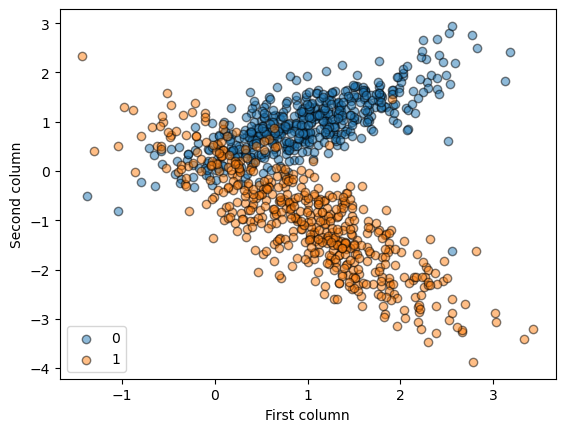

In [5]:
### WRITE YOUR CODE HERE ###
#print(X)
plt.scatter(X[y==0,0],X[y==0,1],label='0',alpha=0.5,linewidths=1,edgecolors='black')
plt.scatter(X[y==1,0],X[y==1,1],label='1',alpha=0.5,linewidths=1,edgecolors='black')

plt.xlabel('First column') # label the axis
plt.ylabel('Second column')

plt.legend(loc="best") # with legend

In [29]:
#print(y==0)

<b>Exercise 2:</b>

We split our data into train and test data. Then we can train our model (a random forest) on the train data and evaluate the model on the hold out test data. We split the data in a way that we train our model on 67% of the data and test our model on 33% of the data.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

Train a random forest on the training data and report the accuracy for this model on the train and test data using the default parameters of a random forest (from sklearn). What can you conclude from this? .

In [11]:
print(X_train)

[[-0.20255471  0.70295638]
 [ 0.65543315  0.38363071]
 [-0.0226964   0.68889125]
 ...
 [ 1.43974353  1.52690477]
 [ 1.07827755  1.30634924]
 [ 1.64491788 -1.8276176 ]]


In [8]:
clf = RandomForestClassifier(100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
numberofpredictions=0
predict=clf.predict(X_train)
for i in range(len(y_train)):
    if predict[i] == y_train[i]:
        numberofpredictions+=1
print((len(y_train)))
print(numberofpredictions)
print('loss')
print(len(y_train)-numberofpredictions)

670
670
loss
0


In [10]:
numberofpredictions=0
predict=clf.predict(X_test)
for i in range(len(y_test)):
    if predict[i] == y_test[i]:
        numberofpredictions+=1
print((len(y_test)))
print(numberofpredictions)
print('loss')
print(len(y_test)-numberofpredictions)
#print(clf.predict([[5, 6]]))

330
306
loss
24


In [79]:
#print(array.array('i',y_train))
#range(np.array(y_train))
#print(X_train[7])
#clf.predict(X_test)

## Decision Boundary

Sometimes it is helpful to plot the decision boundary for a learned model. To do so, we create a grid of data points and calculate the probability of belonging to class 1. 
(This can only be done once we have trained the random forest classifier)

In [11]:
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
h = .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

Then we can plot the boundary using the `contourf` function of matplotlib.

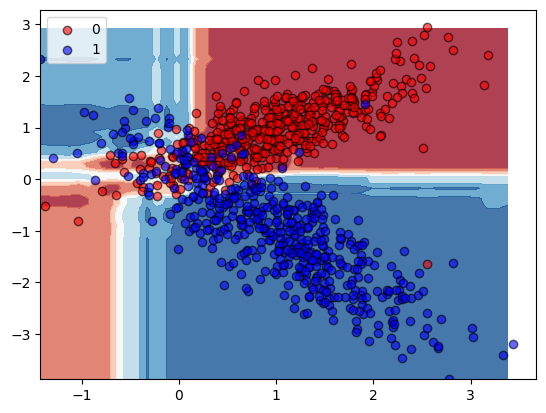

In [12]:
cm = plt.cm.RdBu  # color map
plt.contourf(xx, yy, Z, alpha=.8, cmap=cm)
colors = ['red','blue']
for cur_class in [0,1]:
    plt.scatter(X[y==cur_class, 0], X[y == cur_class, 1], c=colors[cur_class],
                       edgecolors='k', alpha=0.6, label=cur_class)
plt.legend()
plt.show()

What can you conclude from the figure above?
Darker colors is the prediction high, and lower darker areas are prediction low.

Um sicher zu gehen, wähle einen Wert für die Anzahl der Bäume und dann teile deine Trainingsdaten nochmal auf in train2 und validieren und teste es dort durch. Am besten dort auch rotieren. 

## Parameter Selection

The implementation of the random forest algorithm in sklearn has many parameter. The most important ones are the number of trees used (n_estimators) and the maximal depth of a single tree (max_depth). Investigate how the number of used trees effects the training and testing accuracy.

<b>Exercise 3:</b>

Plot a diagram that shows the training and testing accuracy depending on the number of trees (from 1 to 20) used. This plot should look like this:
<img src="figures/num_trees.png" style="background-color:white;" width="600"/>

Calculation of accuracy depends on the correct predictions $ {\color{RawSienna}n}_{\color{VioletRed}i} $ and the amount of data $ N $:

$$ 
{\color{CornflowerBlue}\eta} = \frac{\mathop{\color{CornflowerBlue}\sum}_{{\color{VioletRed}i}}\,{\color{RawSienna}n}_{\color{VioletRed}i}}{N}
$$

In [32]:
### WRITE YOUR CODE HERE ###
RunLength=100
ResultArray = np.ones(shape=(RunLength-1, 3))
def trainRandomForestTrain(n):
    clf = RandomForestClassifier(n)
    clf.fit(X_train, y_train)
    numberofpredictions=0
    predict=clf.predict(X_train)
    for i in range(len(y_train)):
        if predict[i] == y_train[i]:
            numberofpredictions+=1
    #print(numberofpredictions/len(y_train))
    return numberofpredictions/len(y_train)
def trainRandomForestTest(n):
    clf = RandomForestClassifier(n)
    clf.fit(X_train, y_train)
    numberofpredictions=0
    predict=clf.predict(X_test)
    for i in range(len(y_test)):
        if predict[i] == y_test[i]:
            numberofpredictions+=1
    #print(numberofpredictions/len(y_test))
    return numberofpredictions/len(y_test)
for i in range(1,RunLength):
    ResultArray[i-1,0]=i
    ResultArray[i-1,1]=trainRandomForestTest(i)
    ResultArray[i-1,2]=trainRandomForestTrain(i)

In [26]:
#print(ResultArray)

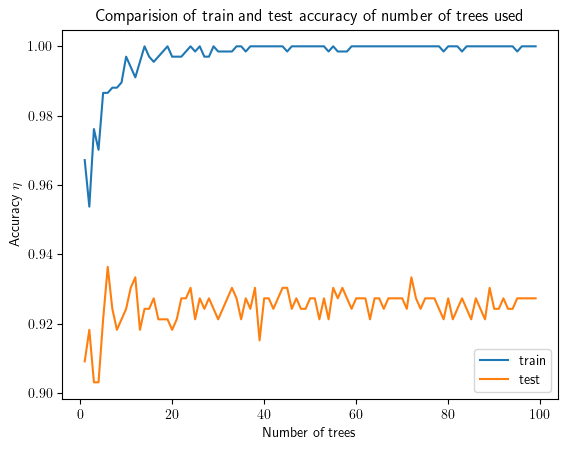

In [36]:
plt.plot(ResultArray[:,0], ResultArray[:,2],label='train')
plt.plot(ResultArray[:,0], ResultArray[:,1],label='test')
#plt.plot(x, y)
plt.xlabel("Number of trees")  # add X-axis label
plt.ylabel("Accuracy ${\eta}$")  # add Y-axis label
plt.title("Comparision of train and test accuracy of number of trees used")  # add title
plt.legend()
plt.show()

<b>Optional:</b>

We want to further investigate how the number of used trees effects the training and testing accuracy. 
We want to increase the number of trees to a maximum of 50.

Plot a diagram that shows the training and testing accuracy depending on the number of trees (from 1 to 50) used.

In [19]:
### WRITE YOUR CODE HERE ###
# see last exercise

<b>Exercise 4:</b>

We saw how the number of trees influences training and testing accuracy. 
Now we do same thing for the other important parameter max_depth.
Train multiple models with different depths. 
The models should use 30 trees as estimators.

Plot a diagram that shows the training and testing accuracy depending on the maximal depth of a single tree (from 1 to 50). 
This plot should look like this:

<img src="figures/max_depth.png" style="background-color:white;" width="600"/>

In [40]:
### WRITE YOUR CODE HERE ###
RunLength=50
ResultArray2 = np.ones(shape=(RunLength-1, 3))
def trainRandomForestTrain(n):
    clf = RandomForestClassifier(1,max_depth=n)
    clf.fit(X_train, y_train)
    numberofpredictions=0
    predict=clf.predict(X_train)
    for i in range(len(y_train)):
        if predict[i] == y_train[i]:
            numberofpredictions+=1
    #print(numberofpredictions/len(y_train))
    return numberofpredictions/len(y_train)
def trainRandomForestTest(n):
    clf = RandomForestClassifier(1,max_depth=n)
    clf.fit(X_train, y_train)
    numberofpredictions=0
    predict=clf.predict(X_test)
    for i in range(len(y_test)):
        if predict[i] == y_test[i]:
            numberofpredictions+=1
    #print(numberofpredictions/len(y_test))
    return numberofpredictions/len(y_test)
for i in range(1,RunLength):
    ResultArray2[i-1,0]=i
    ResultArray2[i-1,1]=trainRandomForestTest(i)
    ResultArray2[i-1,2]=trainRandomForestTrain(i)

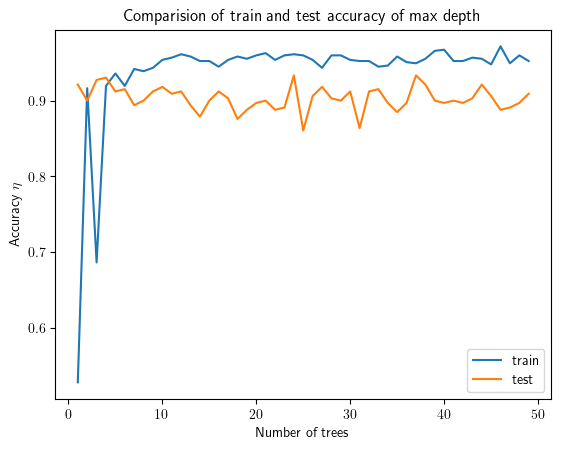

In [42]:
plt.plot(ResultArray2[:,0], ResultArray2[:,2],label='train')
plt.plot(ResultArray2[:,0], ResultArray2[:,1],label='test')
#plt.plot(x, y)
plt.xlabel("Number of trees")  # add X-axis label
plt.ylabel("Accuracy ${\eta}$")  # add Y-axis label
plt.title("Comparision of train and test accuracy of max depth")  # add title
plt.legend()
plt.show()

## Churn Data Set
Lets revisit the churn data set from the first tutorial.

In [16]:
churn_df = pd.read_csv('telecom_churn.csv')
label = churn_df['Churn']
churn_df = churn_df.drop(columns=['Churn'])

<b>Exercise 5:</b>

Create a data set containing only the numeric values. <b>Optional:</b> Try to convert all non numeric values to numeric values using a one hot encoding or by binning them. 

one hot encoding: means convert the states in coloumns with coloumns were for every possible value a zero or one stands.

labelencoder: keine numerische Ordnung in den Daten, kann zu Probleme führen

fit_transform nur auf trainingsdaten

In [43]:
### WRITE YOUR CODE HERE ###
churn_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

<b>Exercise 6:</b>

Train a model on this data set and visualize the most important features in a figure. This should look like this (The scaling and order of features can be different):

<img src="figures/importance.png" width="600"/>

<b>Hint</b>: The method `feature_importance` should be used.
What can you conclude?
Use also randomforest

In [ ]:
### WRITE YOUR CODE HERE ###


<b>Exercise 7:</b>

If we want to use a random forest to solve regression problems we can use the RandomForestRegressor from sklearn.
* Generate an easy regression data set using make_regression with 10 features. (use function make_regression)
* Split the data set into a train and test set.
* Train a model and report the training and testing mean square error (can be calculated using sklearn.metrics.mean_squared_error), absoluten error, prozentuellen error, logarithmus
* wie schwer regressionsproblem mit statistik ststistische baselines, am häufigsten dargestellt, distribution, mittelwert berechnen(aus label auf den trainingsdaten, sollte höher sein als der berechnete mean squared error
sklearn.preprocessing.StandardScaler — scikit-learn 1.4.2 documentation 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform
sklearn.preprocessing.LabelEncoder — scikit-learn 1.4.2 documentation 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html


In [ ]:
### WRITE YOUR CODE HERE ###
